In [159]:
import numpy as np
import pandas as pd
from PIL import Image, ImageDraw, ImageFont
import matplotlib.pyplot as plt
pd.options.display.max_colwidth=120
pd.options.display.max_rows=120

In [164]:
dfdnames = pd.read_csv('ade20k_detail_names.csv')
len(dfdnames.loc[(dfdnames.name!=dfd.raw_name)])

266664

In [161]:
dfd15 = pd.read_csv('ade_coco_15pts.csv')
print(len(dfd15), len(dfd15.header_id.value_counts().index))
dfd15.num_mask_points.describe()
len(dfd15.coco_label.value_counts().index)

58562 14406


78

In [102]:
dfh = pd.read_csv('ade20k_header.csv')
dfd = pd.read_csv('ade20k_detail.csv')

In [137]:
header_id = 1914
dfh.loc[dfh.header_id==header_id]

,header_id,width,height,filename,folder,scene
1188,1914,280,210,ADE_train_00001914.jpg,ADE20K_2021_17_01/images/ADE/training/home_or_hotel/attic,"['indoor', 'home or hotel', 'attic']"


In [107]:
dfd.num_mask_points.value_counts()[:10]

4     113790
6      37038
5      35173
8      31918
7      30110
9      28578
10     27842
11     24634
12     23182
13     20938
Name: num_mask_points, dtype: int64

In [108]:
dfd.loc[(dfd.header_id==header_id) & (dfd.raw_name.str.contains('motor'))]

,id,raw_name,depth_ordering_rank,crop,header_id,num_mask_points,xmin,ymin,xmax,ymax,width,height
535901,61,left leg,62,0,17728,21,1837,1385,1982,1533,145,148
535902,62,right leg,63,0,17728,14,1972,1394,2046,1526,74,132
535906,66,right leg,67,0,17728,50,1648,1228,1719,1479,71,251
535907,67,left leg,68,0,17728,64,1568,1227,1654,1476,86,249
535915,75,right leg,76,0,17728,72,11,1155,129,1362,118,207
535916,76,left leg,77,0,17728,21,54,1153,87,1232,33,79
535917,77,left leg,78,0,17728,30,91,1266,147,1349,56,83
535919,79,right leg,80,0,17728,48,166,1170,234,1337,68,167
535920,80,left leg,81,0,17728,39,149,1168,192,1305,43,137
535925,85,left leg,86,0,17728,41,326,1087,364,1283,38,196


In [136]:
dfd.loc[dfd.raw_name.str.contains('motor')].raw_name.value_counts()

motorbike         589
motor              56
motorbikes         48
motorboat           3
motorbike cart      1
motorboats          1
Name: raw_name, dtype: int64

In [24]:
dfh.loc[dfh.header_id==header_id][['folder', 'filename']].values

array([['ADE20K_2021_17_01/images/ADE/training/urban/street',
        'ADE_train_00017728.jpg']], dtype=object)

In [121]:
coco_classes = ['person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'street sign', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'hat', 'backpack', 'umbrella', 'shoe', 'eye glasses', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'plate', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed', 'mirror', 'dining table', 'window', 'desk', 'toilet', 'door', 'tv', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'blender', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush', 'hair brush']

In [122]:
ade_classes = dfd.raw_name.value_counts().index

In [130]:
[c for c in ade_classes if 'bana' in c]

['bananas']

In [119]:
len(dfd.loc[dfd.num_mask_points>=15])

237471

In [116]:
dfd.loc[(dfd.header_id==header_id) & (dfd.raw_name=='person')]

,id,raw_name,depth_ordering_rank,crop,header_id,num_mask_points,xmin,ymin,xmax,ymax,width,height
535840,0,person,1,0,17728,23,1536,930,1769,1486,233,556
535841,1,person,2,0,17728,14,119,985,270,1365,151,380
535849,9,person,10,0,17728,22,1087,988,1160,1165,73,177
535851,11,person,12,1,17728,27,1764,954,2049,1534,285,580
535855,15,person,16,0,17728,36,317,969,408,1285,91,316
535856,16,person,17,0,17728,35,406,959,507,1281,101,322
535858,18,person,19,0,17728,40,10,991,147,1363,137,372
535884,44,person,45,0,17728,28,1161,987,1225,1141,64,154
535885,45,person,46,1,17728,16,1296,1009,1338,1113,42,104
535886,46,person,47,0,17728,21,1428,1002,1470,1179,42,177


(280, 210) (280, 210) (120, 0, 170, 18)


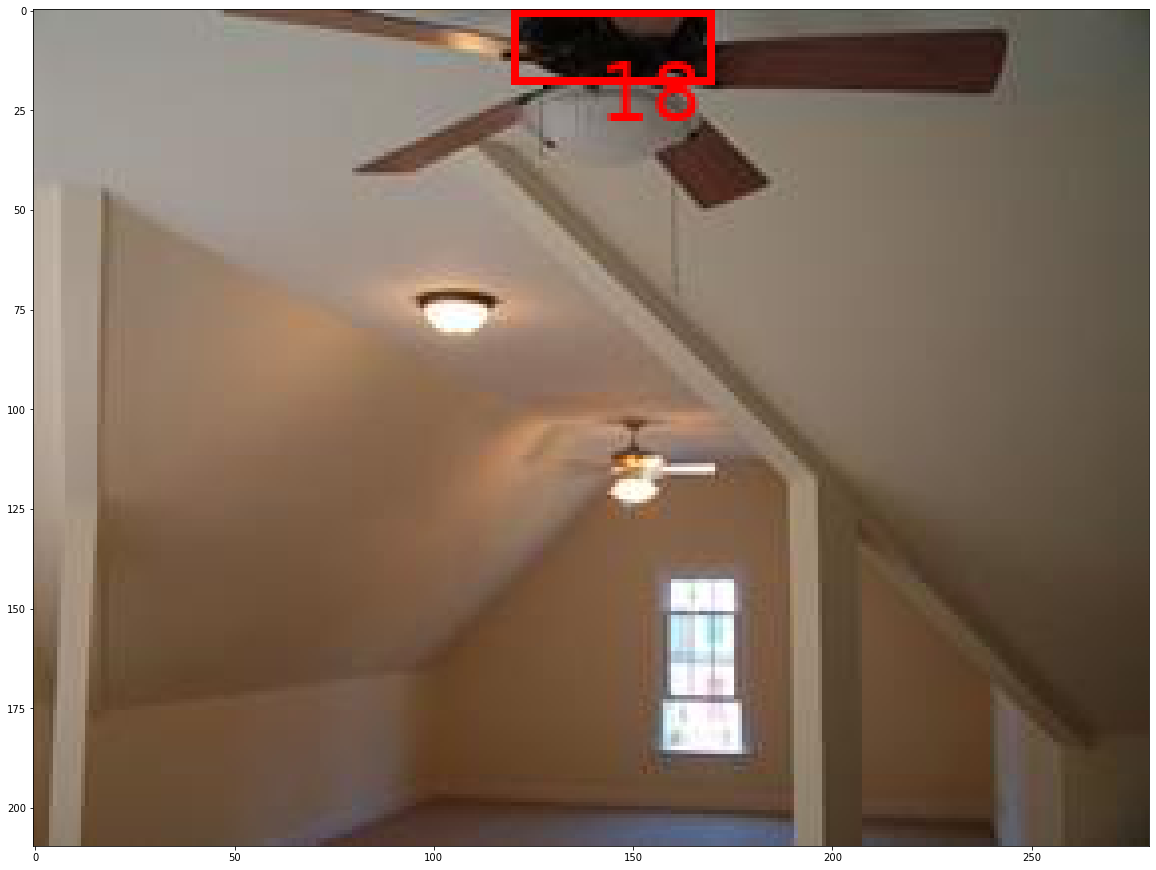

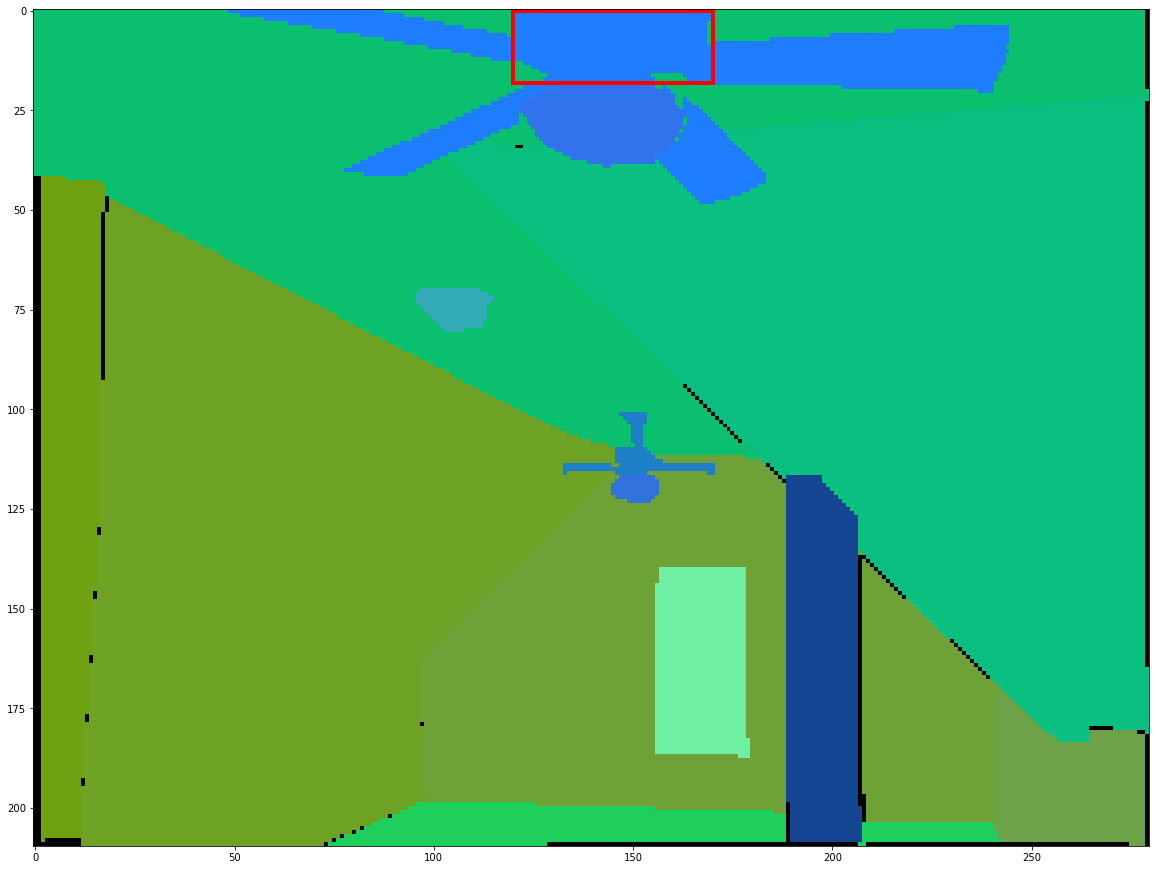

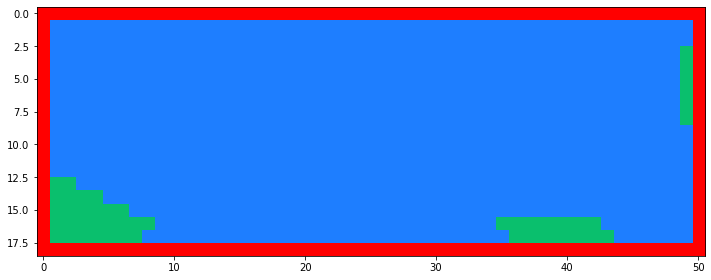

In [139]:
folder, filename = dfh.loc[dfh.header_id==header_id][['folder', 'filename']].values[0]
segfile = '{}_seg.png'.format(filename.split('.')[0])
font = ImageFont.truetype("Vera.ttf", 20)
with Image.open('../{}/{}'.format(folder, filename)) as im, Image.open('../{}/{}'.format(folder, segfile)) as seg:

    np_im = np.array(im)
    draw_im = ImageDraw.Draw(im)
    draw_seg = ImageDraw.Draw(seg)
    
    dfdid = 18
    
    dfd_values = dfd.loc[(dfd.header_id==header_id) & (dfd.id==dfdid)][['xmin', 'ymin', 'xmax', 'ymax', 'width', 'height']].values[0]
    xmin, ymin, xmax, ymax, width, height = dfd_values
    draw_im.rectangle((xmin, ymin, xmax, ymax), width=2, outline='red')
    draw_im.text((xmin+width/2.2, ymin+height/2), str(dfdid), (256,0,0), font=font)
    draw_seg.rectangle((xmin, ymin, xmax, ymax), width=1, outline='red')
    print(im.size, seg.size, (xmin, ymin, xmax, ymax))

    im_crop = seg.crop((xmin, ymin, xmax+1, ymax+1))
    plt.figure(figsize=(20,16))
    plt.imshow(im)
    plt.figure(figsize=(20,16))
    plt.imshow(seg)
    plt.figure(figsize=(10,8))
    plt.imshow(im_crop)

    plt.tight_layout()
    

In [30]:
import spacy
spacy.prefer_gpu()

True

In [31]:
nlp = spacy.load('en_core_web_lg')

In [41]:
classes = dfd.raw_name.value_counts().index.tolist()
vecs = [nlp(c).vector.get() for c in classes]

In [34]:
len(vecs)

3488

In [37]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

In [79]:
pca = PCA(n_components=2)
vecs_2 = pca.fit_transform(vecs[:100])

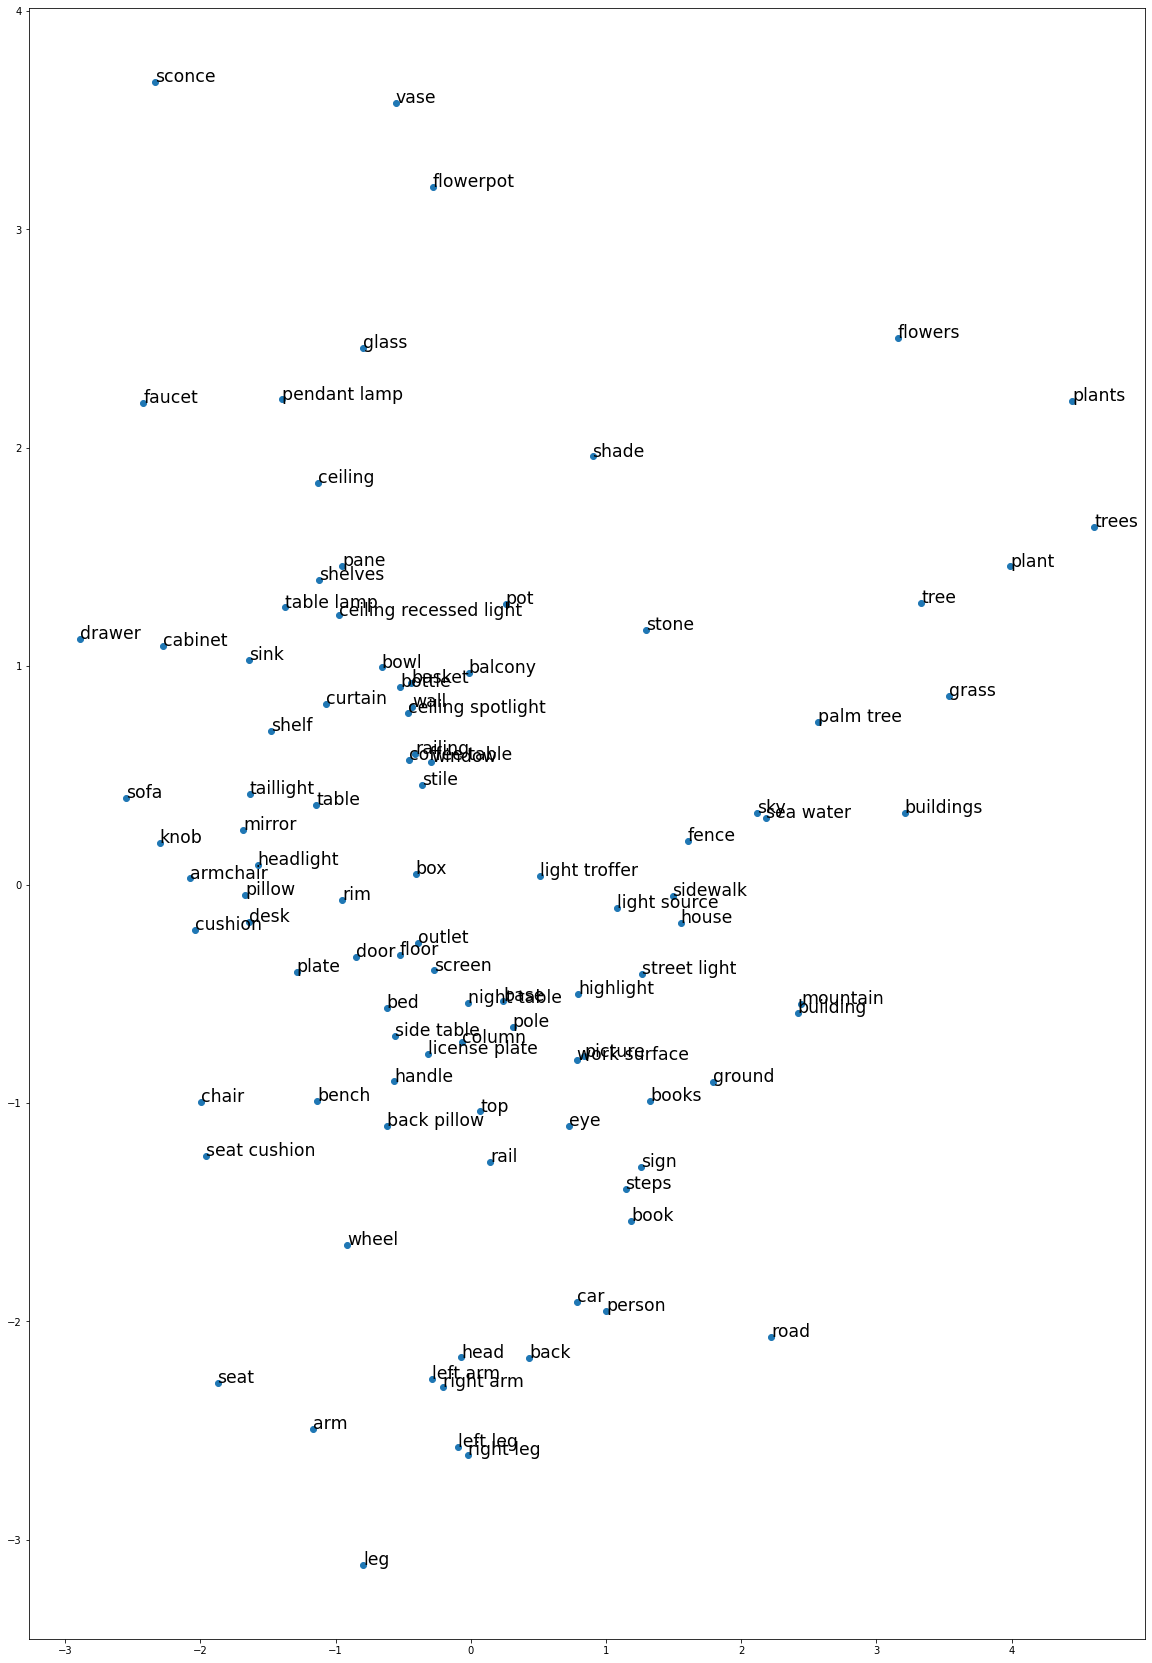

In [89]:
plt.figure(figsize=(20,30))
x = vecs_2[:,0]
y = vecs_2[:,1]
plt.scatter(x, y)
for i, w in enumerate(vecs_2):
    plt.annotate(classes[i], (x[i], y[i]), fontsize='xx-large')

In [90]:
pca = PCA(n_components=3)
vecs_3 = pca.fit_transform(vecs[:100])

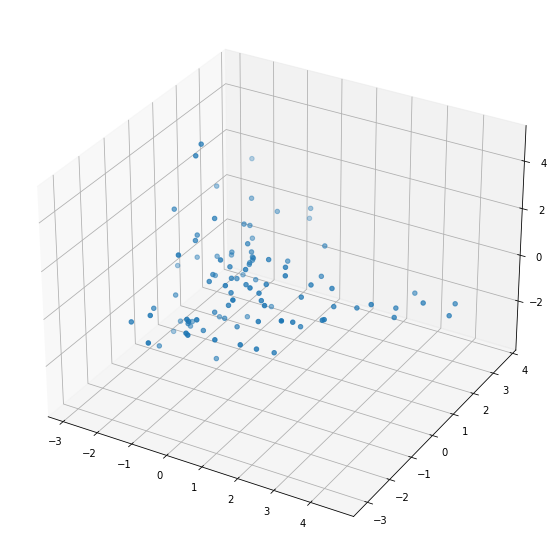

In [94]:
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(projection='3d')
x = vecs_3[:,0]
y = vecs_3[:,1]
z = vecs_3[:,2]
ax.scatter(x, y, z)
for i in range(len(vecs_3)):
    ax.annotate(classes[i], (x[i], y[i]), fontsize='xx-large')


In [96]:
for c in ['person', 'leg', 'wall', 'sky', 'ceiling', 'grass']:
    i = classes.index(c)
    print(c, vecs_3[i])

person [ 1.00252417 -1.95170902 -0.48673721]
leg [-0.79389318 -3.11430326 -0.21289847]
wall [-0.43249712  0.81417885  0.23172818]
sky [2.11518086 0.32932708 0.43939163]
ceiling [-1.13254134  1.84008426 -0.03546927]
grass [ 3.53758618  0.8628707  -0.61891029]
